In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os

# Loading and Plotting Data with pandas and matplotlib

In [2]:
df = pd.read_csv("/kaggle/input/random-linear-regression/train.csv")
df = df.dropna(subset=['y'])
print(df.head())

      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984


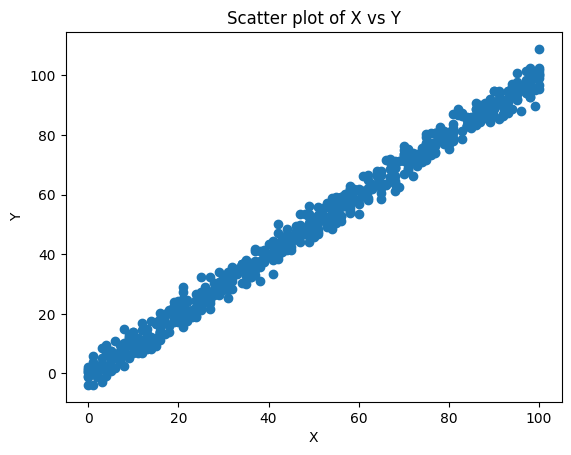

In [3]:
# Plotting Data
plt.scatter(df['x'], df['y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of X vs Y')
plt.show()

In [4]:
X = df['x'].values
Y = df['y'].values

# Using Linear Regression with gradient decedent

In [5]:
w = 0.0
b = 0.0

def predict(X, w, b):
    return w*X + b

def cost(X, Y, w, b):
    predictions = predict(X, w, b)
    return 0.5 * np.mean((predictions - Y) ** 2)

In [6]:
def gradient_descent(X, Y, w, b, alpha):
    predictions = predict(X, w, b)
    w_change = np.mean((predictions - Y) * predictions)
    b_change = np.mean((predictions - Y))
    
    return (w - (alpha * w_change), b - (alpha * b_change))


    


In [7]:
alpha = 0.0005
prev_cost = float('inf')  # Initialize previous cost with infinity
cost_history = []  # List to store cost values for each iteration
w_history = []  # List to store w values for each iteration
b_history = []  # List to store b values for each iteration

for i in range(100):  # Limiting to 100 iterations for safety
    current_cost = cost(X, Y, w, b)
    cost_history.append(current_cost)  # Store current cost
    w_history.append(w)  # Store current w
    b_history.append(b)  # Store current b
    
    if abs(current_cost - prev_cost) < 0.0001:
        print("Convergence reached. Stopping the optimization.")
        break
    
    w, b = gradient_descent(X, Y, w, b, alpha)
    prev_cost = current_cost

Convergence reached. Stopping the optimization.


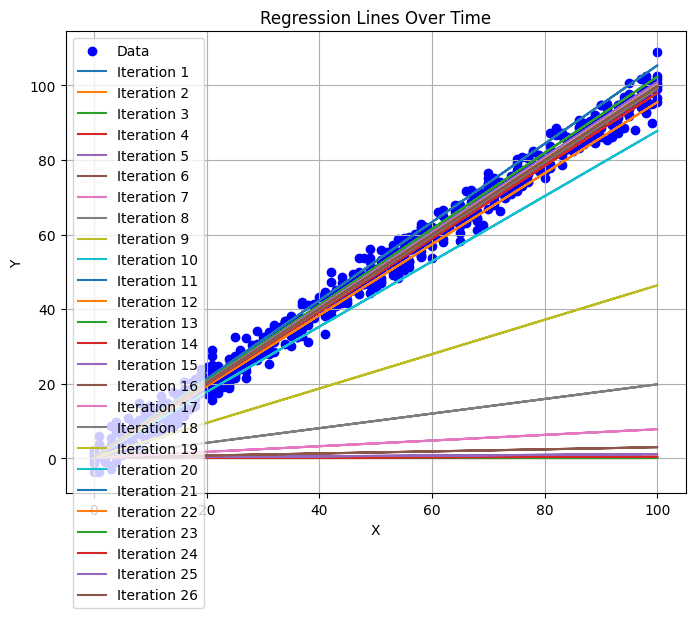

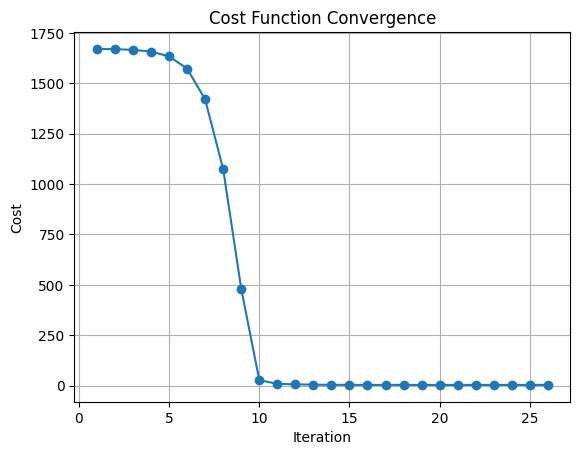

3.946260951634639


In [8]:
# Plot all regression lines
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Data')  # Data points

for i in range(len(w_history)):
    y_pred = w_history[i] * X + b_history[i]
    plt.plot(X, y_pred, label=f'Iteration {i+1}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Lines Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot cost function value vs. iteration number
plt.plot(range(1, len(cost_history) + 1), cost_history, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.grid(True)
plt.show()
print(cost(X, Y, w, b))

In [9]:
df_test = pd.read_csv("/kaggle/input/random-linear-regression/test.csv")
df_test = df_test.dropna(subset=['y'])
print(df_test.head())

    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864


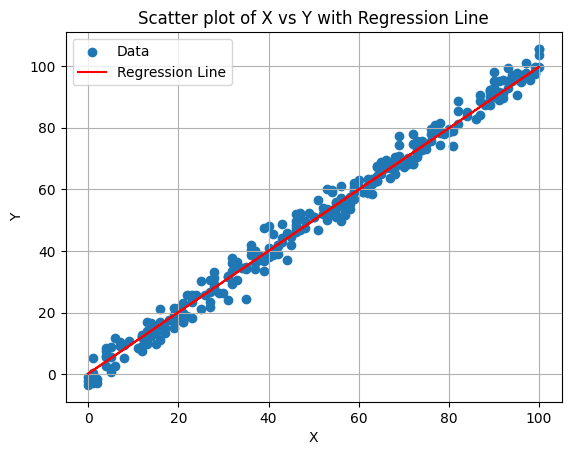

4.7589551202790625


In [10]:
x_test = df_test['x'].values
y_test = df_test['y'].values

y_pred = w * x_test + b

# Plotting Data
plt.scatter(df_test['x'], df_test['y'], label='Data')
plt.plot(x_test, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of X vs Y with Regression Line')
plt.legend()
plt.grid(True)
plt.show()

print(cost(x_test, y_test, w, b))

# Using Least Squares (w/SVD Psudeo Inverse)

In [11]:
A = df['x'].values
b = df['y'].values

In [12]:
# append a columns of 1s (these are the biases)
A = np.column_stack([A, np.ones(A.shape[0])])

In [13]:
U,S,Vt = np.linalg.svd(A, full_matrices=False)


### Pseudoinverse Calculation with SVD

Given a matrix \( X \), we can compute its pseudoinverse \( X^+ \) using Singular Value Decomposition (SVD). The pseudoinverse allows us to solve the least squares problem efficiently.

1. **SVD Decomposition**:
   - Compute the SVD of the matrix \( X \): \( X = U \Sigma V^T \), where:
     - \( U \) is an \( m \times m \) orthogonal matrix.
     - \( \Sigma \) is an \( m \times n \) diagonal matrix with non-negative real numbers on the diagonal (the singular values).
     - \( V^T \) is an \( n \times n \) orthogonal matrix.

2. **Pseudoinverse Calculation**:
   - The pseudoinverse of \( X \), denoted as \( X^+ \), is computed as follows:
     \[ X^+ = V \Sigma^+ U^T \]
     where:
     - \( \Sigma^+ \) is the pseudoinverse of \( \Sigma \), obtained by taking the reciprocal of its non-zero singular values and transposing the resulting matrix.

3. **Least Squares Solution**:
   - To solve the linear system \( Ax = b \) for the best possible approximate solution in terms of least squares, we use the pseudoinverse:
     \[ x = X^+ b \]

In [14]:
# solve Ax = b for the best possible approximate solution in terms of least squares
x_hat = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
print(x_hat)

[ 1.00065638 -0.10726546]


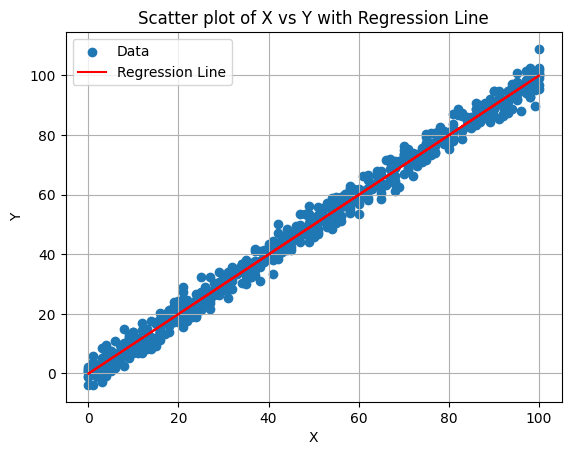

3.9338763667438434


In [15]:
w = x_hat[0]
b = x_hat[1]
y_pred = w * X + b

plt.scatter(df['x'], df['y'], label='Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of X vs Y with Regression Line')
plt.legend()
plt.grid(True)
plt.show()
print(cost(X, Y, w, b))

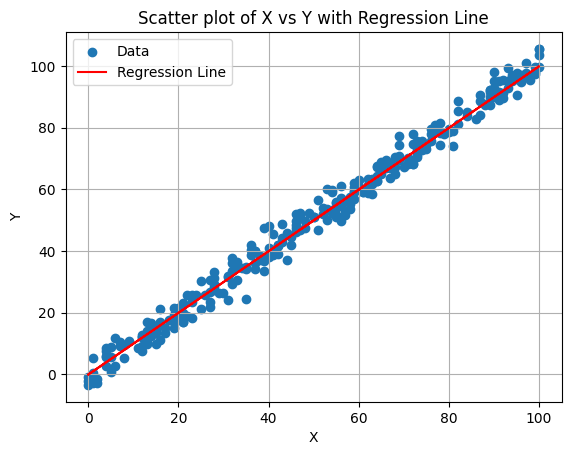

4.716461096019659


In [16]:
y_pred = w * x_test + b

# Plotting Data
plt.scatter(df_test['x'], df_test['y'], label='Data')
plt.plot(x_test, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of X vs Y with Regression Line')
plt.legend()
plt.grid(True)
plt.show()

print(cost(x_test, y_test, w, b))